# Part I - Ford GoBike System
## by Amani Bouguel

## Table of Contents
<a id="toc"></a>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The datasset to be explored contains information about individual trips made in a bike-sharing system covering the greater San Francisco Bay Area in February 2019.
I chose this dataset for its important ecological impact. It would help to get a greener environment.
Within this first part of the project, exporatory analysis will applied 

<a id='wrangling'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
dfBike=pd.read_csv('201902-fordgobike-tripdata.csv')
df=dfBike.copy()

In [3]:
# check the first 5 rows in the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the number of rows and columns
df.shape

(183412, 16)

In [5]:
# get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We can notice 2 main things: 
<ul>
<li> there are some missing data in the dataset </li>
<li> the timestamp columns are set to object</li>
</ul>

In [6]:
# check the sum of null cells in each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The columns with missing data are:
1. start_station_id
2. start_station_name
3. end_station_id 
4. end_station_name
5. member_birth_year
6. member_gender

As the main target of the project is exploratory analysis using visualizations. I will not clean missing data at this step. If needed, data cleaning will be performed during data exploration. </br> Let's check general statistics and if there are some duplicated data.

In [7]:
# check if there are some duplicated data
sum(df.duplicated())

0

There are not duplicated data

In [8]:
#general statitics 
df.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


bike_share_for_all_trip column type shall be altered from object to boolean

### Cleaning issue 1:
Timestamp's data type shall be altered from object to datetime

#### Define 
set timestamp data type to datetime

#### Code

In [9]:
df.start_time = pd.to_datetime(df.start_time)

In [10]:
df.end_time = pd.to_datetime(df.end_time)

#### Test

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Cleaning issue2:
bike_share_for_all_trip seems to be a boolean column. So we need to change its type.

#### Define 
set bike_share_for_all_trip data type to boolean

#### Code

In [12]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [13]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

#### Test

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> The dataset contains 183412 rows and 16 columns. </br>
There are no duplicated entries but we can notice several missing ones in six columns. </br>
We can classify the feature into:
> <ul>
    <li>9 numerical</li>
    <li>2 datetime</li>
    <li>1 boolean</li>
    <li>4 strings</li>
    
</ul>

### What is/are the main feature(s) of interest in your dataset?

> The main feature are those related to the trip duration, the start time, the customer's type and gender and the station. I believe thes features would explain the usage way of Ford GoBike System.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe that all the features will be helpful to support my investigation. I will try to explore them based on the project requirements

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='uni'></a>
## Univariate Exploration

### 1. visualizing trips' duration:

#### Question
What is the duration distribution of trips. </br>
Do customer's use Ford GoBike system for long duration trips or short ones?

#### Code

In [15]:
def histogram(fig, df, axis, title,xlabel,ylabel):
    """
    This function is used to draw histograms
    """
    plt.figure(figsize=fig)
    plt.hist(data = df, x = axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

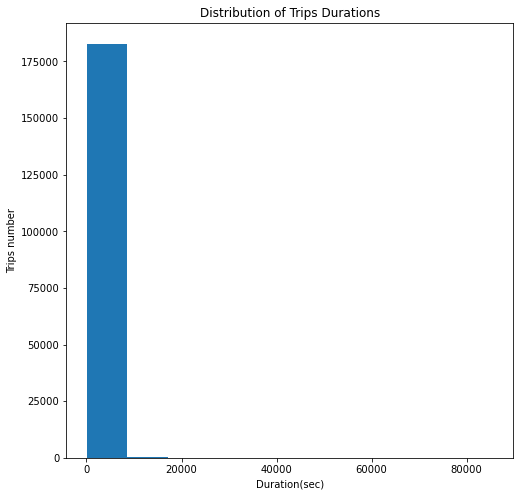

In [16]:
histogram([8,8], df, 'duration_sec', 'Distribution of Trips Durations','Duration(sec)','Trips number')

It seems that the axis scale does not fit with the distribution. We will need to customized

In [17]:
def histogramTicks(fig, df, axis, title,xlabel,ylabel,l1,l2, scale):
    """
    This function is used to draw histograms with xticks option
    """
    plt.figure(figsize=fig)
    plt.hist(data = df, x = axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale(scale)
    plt.xticks(l1, l2)
    plt.show()

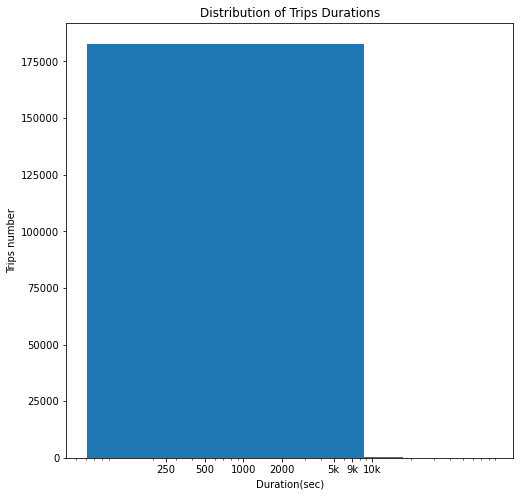

In [18]:
l1=[250,500, 1e3, 2e3, 5e3,7e3, 1e4]
l2=[250,500, '1000', '2000', '5k', '9k','10k']
histogramTicks([8,8], df, 'duration_sec', 'Distribution of Trips Durations','Duration(sec)','Trips number',l1,l2,'log')

#### Observations

Customers use Ford GoBike System when the trips durations is less than 10000sec which is the about to 2 hours and 47minutes

### 2. visualizing trips number per weekdays:

#### Question
Is there a special weekday the customers tend to use For GoBike System?

#### Code

In [19]:
def bar(fig, keys, values, xlabel, ylabel,title, l1, l2):
    """
    This function is used to draw bar charts
    """
    plt.figure(figsize=fig)
    plt.bar(x = keys, height = values )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(l1, l2)
    plt.title(title)
    plt.show()

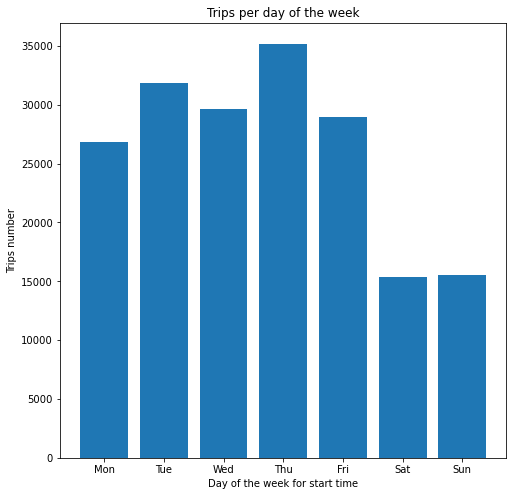

In [20]:
dayOfWeek=df.start_time.dt.dayofweek
#In pandas.Series.dt.dayofweek, 0 means Monday
l1=[0,1,2,3,4,5,6]
l2=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
bar([8,8],dayOfWeek.value_counts().keys(), dayOfWeek.value_counts(), "Day of the week for start time" , "Trips number", "Trips per day of the week", l1, l2)

#### Observations

Customers tend to use Ford GoBike System on Thursday then on Tuesday. finding a spcial explanation for these 2 specific days is hard.

### 3. visualizing users' age distribution:

#### Question
What is the age distribution of Ford GoBike system users?

#### Code

In [21]:
# check the min of member_birth_year
df.member_birth_year.min()

1878.0

This entry is illogic. The user's age is 141.</br>
Let's check the number of users with this entry

In [22]:
dfOld=df.query('member_birth_year==1878.0')
dfOld

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,False


As it is only one entry, I will delete it

In [23]:
df.drop(index = [27370],inplace=True)

In [24]:
# recheck the min of member_birth_year
df.member_birth_year.min()

1900.0

This entry is also illogic. The user's age is 119.</br>
Let's check the number of users with this entry

In [25]:
dfOld=df.query('member_birth_year==1900.0')
dfOld.shape

(53, 16)

There are 53 rows. </br>
As these entries are illogic I believe that the number of rows will be the least compared to the logic entries </br>
Let's check the least 20 entries in terms of member_birth_year.

In [26]:
least20AgeEntries=np.array(df['member_birth_year'].value_counts().sort_values(ascending=True).head(20).index)
least20AgeEntries

array([1927., 1928., 1910., 1930., 1934., 1944., 1938., 1920., 1901.,
       1941., 1902., 1939., 1946., 1933., 1942., 1943., 2001., 1948.,
       1900., 1931.])

As expected, the dataset contains illogic entries except for 2001. </br>
I believe that users aged more than 70, will find it hard to bike unless being sportsmen </br>
I intend to keep only users aged 70 or less. Let's check first how many rows would be deleted. 

In [27]:
df2=df.query('member_birth_year<1948.0')
df2.shape

(523, 16)

There are 470which we can remove.

In [28]:
df=df.query('member_birth_year>1948.0')

In [29]:
# recheck the min of member_birth_year
df.member_birth_year.min()

1949.0

In [30]:
# check the max of member_birth_year
df.member_birth_year.max()

2001.0

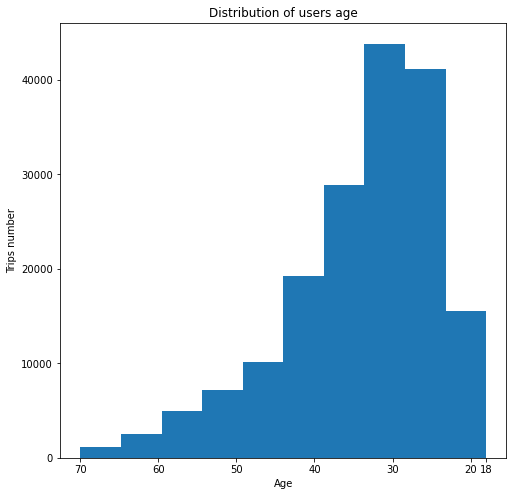

In [31]:
# I will distribute age by decades
l1=[2001,1999,1989,1979,1969,1959,1949]
l2=[18,20,30,40,50,60,70]
histogramTicks([8,8], df, 'member_birth_year', 'Distribution of users age','Age','Trips number',l1,l2,'linear')

#### Observations

The most of users are in their late twenties or early thirties.

### 4. visualizing the rate of different users' types 

#### Question
What is the most common user types?

#### Code

In [32]:
def pieChart(title,values,labelsList,figsize):
    """
    This function is used to draw pie charts
    """
    values.plot(kind='pie',autopct='%1.1f%%', labels=labelsList,figsize=figsize)
    plt.title(title)
    plt.show

In [33]:
values=df.user_type.value_counts()
values

Subscriber    157959
Customer       16613
Name: user_type, dtype: int64

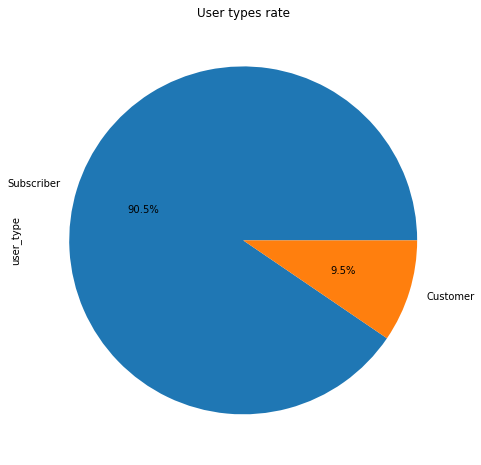

In [34]:
labelsList=["Subscriber","Customer"]
pieChart("User types rate",values,labelsList,(8,8))

#### Observations

90.5% of Ford GoBike System user are subscribers.

### 5. visualizing the rate of different users' genders 

#### Question
What is the most common users gender?

#### Code

In [35]:
values=df.member_gender.value_counts()
values

Male      130176
Female     40772
Other       3624
Name: member_gender, dtype: int64

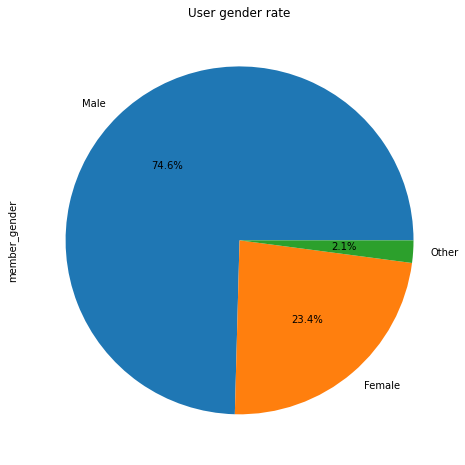

In [36]:
labelsList=["Male","Female","Other"]
pieChart("User gender rate",values,labelsList,(8,8))

#### Observations

The most of Ford GoBike System members are male with a rate 74.6%.

### 6. visualizing top 10 stations as start station:

#### Question
What are the top 10 stations as start stations?

#### Code

In [37]:
#get top 10 listed station as start stations
top10startStations=np.array(df.start_station_name.value_counts().sort_values(ascending=False).head(10).index)
top10startStations

array(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)'], dtype=object)

In [38]:
# filter a dataframe with only top 10 listed station as start stations
dfTopStart=df[df['start_station_name'].isin(top10startStations)]
dfTopStart.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992.0,Female,False
42,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5411,Subscriber,1972.0,Male,False
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,False
63,239,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5731,Subscriber,1986.0,Male,False


In [39]:
# create function to draw horizontal bar chart using seaborn
def horizontalBar(fig, df, axis, dfCounts, title,xlabel,ylabel,dfGlobal):
    """
    This function is used to draw horizontal
    """
    plt.figure(figsize=(10,6))
    order=dfCounts.index.tolist()
    sb.countplot(data=df,y=axis,order=order)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title (title)
    ## add a text with ratings from the Global dataframe
    for i in range(dfCounts.shape[0]):
        valueCount=dfCounts[i]
        rate='{:0.1f}%'.format(100*valueCount/dfGlobal.shape[0])
        plt.text(valueCount,i,rate,va='center')

    plt.show()

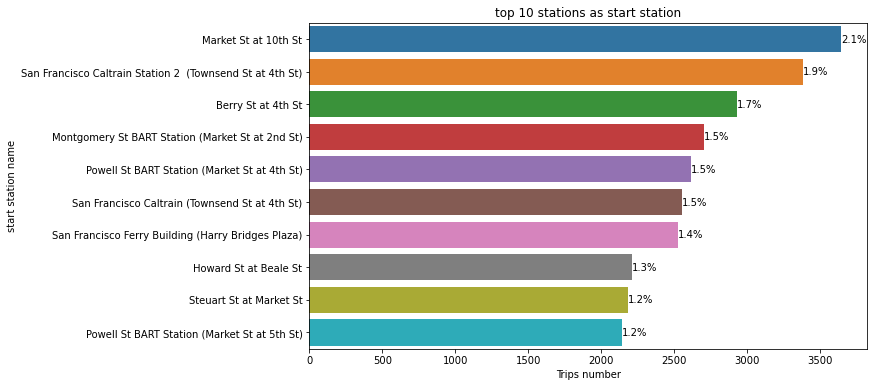

In [40]:
dfCounts=dfTopStart.start_station_name.value_counts()
horizontalBar((10,10), dfTopStart, 'start_station_name', dfCounts, "top 10 stations as start station","Trips number","start station name",df)

#### Observations

There is no big gap between the ratings of the top 10 start stations. The most popular station is Market St at 10th St

### 7. visualizing top 10 stations as end station:

#### Question
What are the top 10 stations as end stations?

#### Code

In [41]:
#get top 10 listed station as end stations
top10endStations=np.array(df.end_station_name.value_counts().sort_values(ascending=False).head(10).index)
top10endStations

array(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Berry St at 4th St', 'The Embarcadero at Sansome St',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)'], dtype=object)

In [42]:
# filter a dataframe with only top 10 listed station as end stations
dfTopEnd=df[df['end_station_name'].isin(top10startStations)]
dfTopEnd.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,2000.0,Male,False
45,717,2019-02-28 23:33:21.095,2019-02-28 23:45:18.510,9.0,Broadway at Battery St,37.798572,-122.400869,58.0,Market St at 10th St,37.776619,-122.417385,6581,Subscriber,1980.0,Male,False
66,457,2019-02-28 23:23:32.035,2019-02-28 23:31:09.406,345.0,Hubbell St at 16th St,37.766483,-122.398279,81.0,Berry St at 4th St,37.775880,-122.393170,6132,Subscriber,1982.0,Female,False
81,294,2019-02-28 23:15:21.113,2019-02-28 23:20:15.798,356.0,Valencia St at Clinton Park,37.769188,-122.422285,58.0,Market St at 10th St,37.776619,-122.417385,5938,Subscriber,1992.0,Female,False


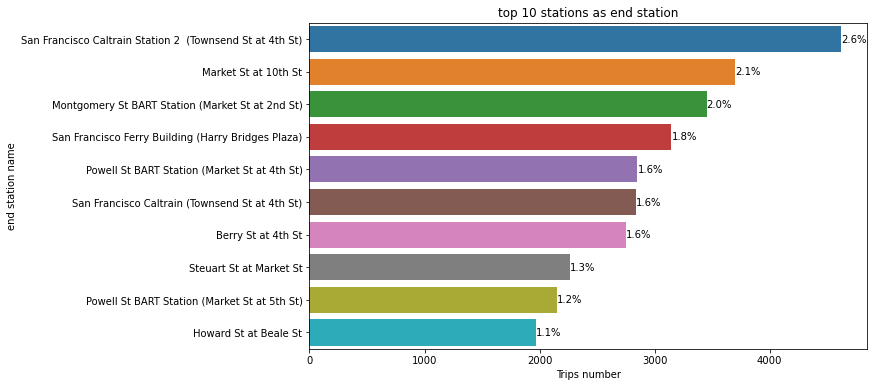

In [43]:
dfCounts=dfTopEnd.end_station_name.value_counts()
horizontalBar((10,10), dfTopEnd, 'end_station_name', dfCounts, "top 10 stations as end station","Trips number","end station name",df)

#### Observations

There is no big gap between the ratings of the top 10 end stations. We can notice that some stations are listed as top start station and as end start station. The most popular station is San Francisco Caltrain Station 2  (Townsend St at 4th St). It is placed 2nd in the top start station.

### 8. visualizing least 10 popular stations as start station:

#### Question
What are the least 10 popular stations as start stations?

#### Code

In [44]:
#get bottom 10 listed station as start stations
bottom10startStations=np.array(df.start_station_name.value_counts().sort_values(ascending=True).head(10).index)
bottom10startStations

array(['16th St Depot', 'Palm St at Willow St',
       '21st Ave at International Blvd', 'Parker Ave at McAllister St',
       'Willow St at Vine St', 'Farnam St at Fruitvale Ave',
       'Taylor St at 9th St', 'Leavenworth St at Broadway',
       'Backesto Park (Jackson St at 13th St)',
       '23rd Ave at Foothill Blvd'], dtype=object)

In [45]:
# filter a dataframe with only bottom 10 listed station as start stations
dfBottomStart=df[df['start_station_name'].isin(bottom10startStations)]
dfBottomStart.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,False
561,724,2019-02-28 20:58:29.271,2019-02-28 21:10:34.156,51.0,Parker Ave at McAllister St,37.776101,-122.453093,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5297,Subscriber,1989.0,Male,False
816,1909,2019-02-28 19:55:19.478,2019-02-28 20:27:09.355,398.0,Leavenworth St at Broadway,37.796471,-122.416858,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,5422,Customer,1993.0,Male,False
952,147,2019-02-28 20:06:50.116,2019-02-28 20:09:18.104,51.0,Parker Ave at McAllister St,37.776101,-122.453093,380.0,Masonic Ave at Turk St,37.779047,-122.447291,4357,Subscriber,1995.0,Male,False
1026,2432,2019-02-28 19:18:37.439,2019-02-28 19:59:09.586,398.0,Leavenworth St at Broadway,37.796471,-122.416858,51.0,Parker Ave at McAllister St,37.776101,-122.453093,5043,Customer,1986.0,Female,False


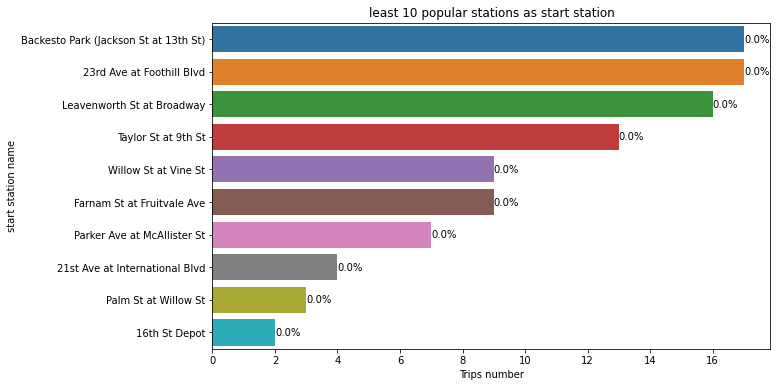

In [46]:
dfCounts=dfBottomStart.start_station_name.value_counts()
horizontalBar((15,15), dfBottomStart, 'start_station_name', dfCounts, "least 10 popular stations as start station","Trips number","start station name",df)

#### Observations

The number of trips is very minimal that we got a rating of 0%. the bike rides are between 2 and 17. The least popular start station is 16th St Depot.

### 8. visualizing least 10 popular stations as end station:

#### Question
What are the least 10 popular stations as end stations?

#### Code

In [47]:
#get top 10 listed station as end stations
bottom10endStations=np.array(df.end_station_name.value_counts().sort_values(ascending=True).head(10).index)
bottom10endStations

array(['21st Ave at International Blvd', 'Willow St at Vine St',
       '16th St Depot', 'Palm St at Willow St',
       'Parker Ave at McAllister St', 'Farnam St at Fruitvale Ave',
       'Taylor St at 9th St', 'Leavenworth St at Broadway',
       'Foothill Blvd at Harrington Ave',
       'Backesto Park (Jackson St at 13th St)'], dtype=object)

In [48]:
# filter a dataframe with only top 10 listed station as start stations
dfBottomEnd=df[df['end_station_name'].isin(bottom10endStations)]
dfBottomEnd.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
144,1471,2019-02-28 22:30:03.424,2019-02-28 22:54:34.560,386.0,24th St at Bartlett St,37.752105,-122.419724,398.0,Leavenworth St at Broadway,37.796471,-122.416858,6372,Subscriber,1989.0,Male,False
195,343,2019-02-28 22:30:22.917,2019-02-28 22:36:06.874,281.0,9th St at San Fernando St,37.338395,-121.880797,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050,3967,Subscriber,1989.0,Male,True
608,422,2019-02-28 20:54:16.888,2019-02-28 21:01:19.566,19.0,Post St at Kearny St,37.788975,-122.403452,398.0,Leavenworth St at Broadway,37.796471,-122.416858,4569,Subscriber,1972.0,Male,False
733,193,2019-02-28 20:37:58.871,2019-02-28 20:41:12.336,380.0,Masonic Ave at Turk St,37.779047,-122.447291,51.0,Parker Ave at McAllister St,37.776101,-122.453093,4357,Subscriber,1995.0,Male,False
780,267,2019-02-28 20:28:39.156,2019-02-28 20:33:07.141,237.0,Fruitvale BART Station,37.775232,-122.224498,228.0,Foothill Blvd at Harrington Ave,37.779930,-122.217728,5789,Subscriber,1984.0,Male,False


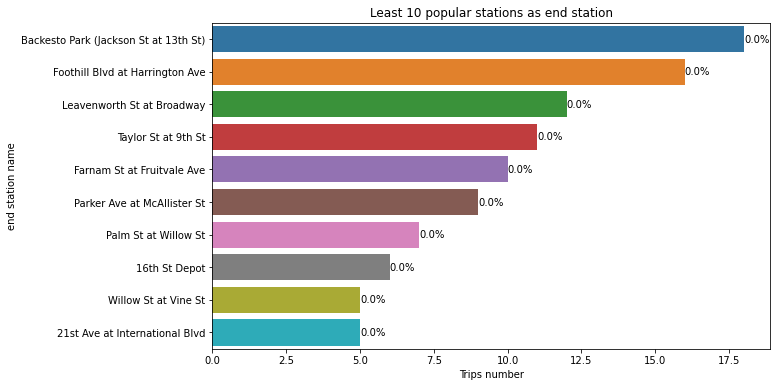

In [49]:
dfCounts=dfBottomEnd.end_station_name.value_counts()
horizontalBar((15,15), dfBottomEnd, 'end_station_name', dfCounts, "Least 10 popular stations as end station","Trips number","end station name",df)

#### Observations

The number of trips is very minimal that we got a rating of 0%. the bike rides are between 5 and 17. The least popular end station is 21st Ave at International Blvd which the third leat popular start station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <ul>
    <li>There are some bike rides which exceeds 2hours</li>
    <li>Thursday is the weekday with the most bike trips which cannot be explained</li>
    <li>Age distribution included more elders than youth</li>
    </ul> 
    </br>
> To draw number of trips for each weekday, I needed to use numpy API to retrive weekdays from the datetime columns
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> <ul>
    <li>Birth year member column included users which are older then 100 years old. This seems illogic. Hence, I opted to remove entries for users aged more than 70</li>
    <li>start time and end time columns type was object. I altered it to datetime to be able extract later weekdays using numpy API</li>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='bi'></a>
## Bivariate Exploration

### 1. visualizing of the distribution of trip duration by users' ags

#### Question
Does the trip duration depends on the users'age?

#### Code

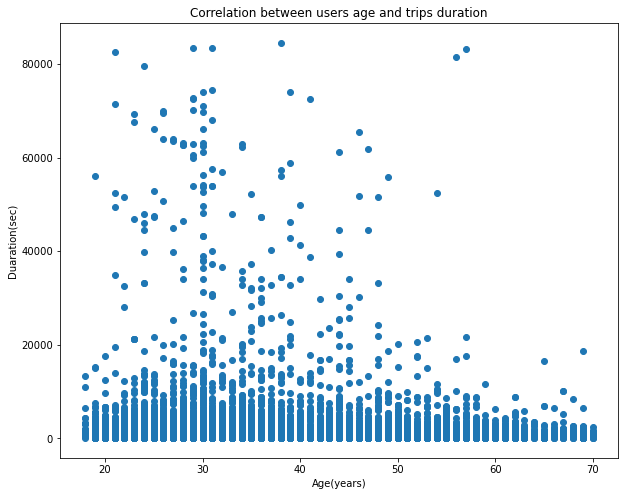

In [50]:
#draw a scatter plot to visualize the corrrelation between duration and user's age
plt.figure(figsize=(10,8))
plt.scatter((2019-df.member_birth_year), df.duration_sec)
plt.xlabel("Age(years)")
plt.ylabel("Duaration(sec)")
plt.title("Correlation between users age and trips duration")
plt.show()

#### Observations

We can notice that trips duration for elders does not exceed 10000sec (around 2hours and 40minutes). Users in their early thirties ride bikes longer than other users.

### 2. visualizing trip duration by users type

#### Question
Who takes longer bike rides: the subscriber or the customer?

#### Code

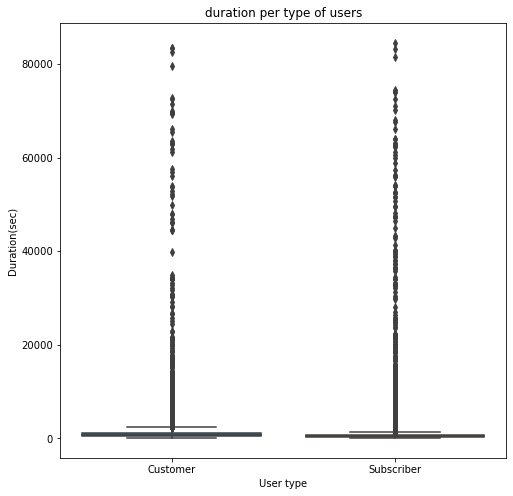

In [51]:
#draw a box plot to visualize which type of users take longer rides
plt.figure(figsize=(8, 8))
sb.boxplot(data=df, x="user_type", y="duration_sec")
plt.xlabel("User type")
plt.ylabel("Duration(sec)")
plt.title("duration per type of users")
plt.show()

Because of duration distribution and its variety of values, we could not visualize a clear box plot. </br>
We are going to limit the values in y axis. I will test int to choose a value as a limit for the final chart.

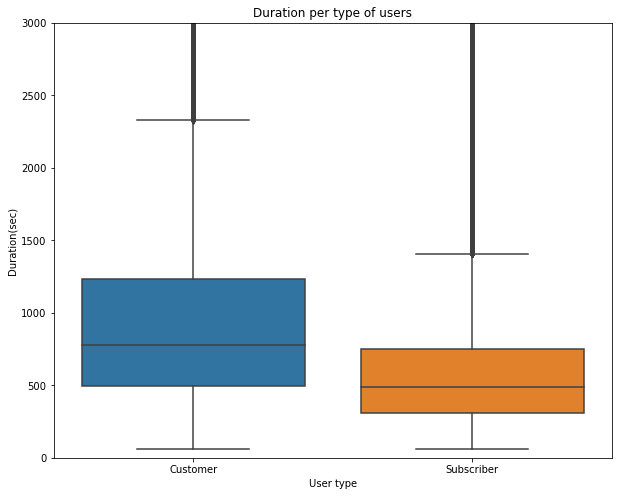

In [52]:
plt.figure(figsize=(10, 8))
sb.boxplot(data=df, x="user_type", y="duration_sec")
plt.ylim([0, 3000])
plt.xlabel("User type")
plt.ylabel("Duration(sec)")
plt.title("Duration per type of users")
plt.show()

#### Observations

Although 90% of users are subscribers, customers take longer rides using Ford GoBike System.   

### 3. visualizing trip duration by users gender

#### Question
Who takes longer bike rides: male, female or other?

#### Code

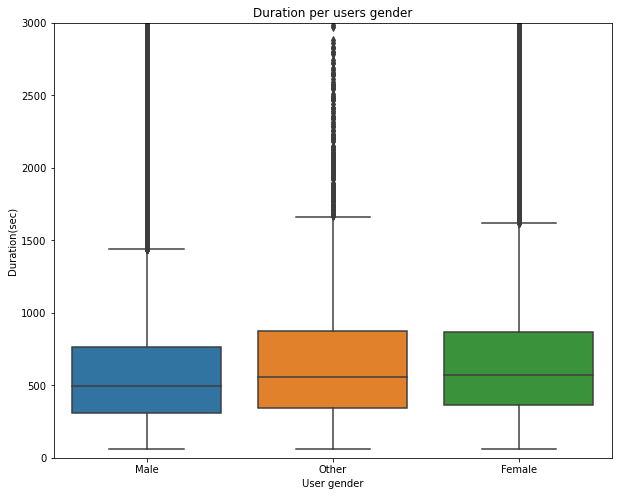

In [53]:
#draw a box plot to visualize which gender takes longer rides. 
#I will use the same limit for duration when I drew the box plot related to duration and user type
plt.figure(figsize=(10, 8))
sb.boxplot(data=df, x="member_gender", y="duration_sec")
plt.ylim([0, 3000])
plt.xlabel("User gender")
plt.ylabel("Duration(sec)")
plt.title("Duration per users gender")
plt.show()

#### Observations

Although 74.6% of users are male, female and other take longer rides using Ford GoBike System.   

### 4. visualizing trips number per day of the week and user type?

#### Question
Does users ride bikes depending on the day of the week and their type?

#### Code

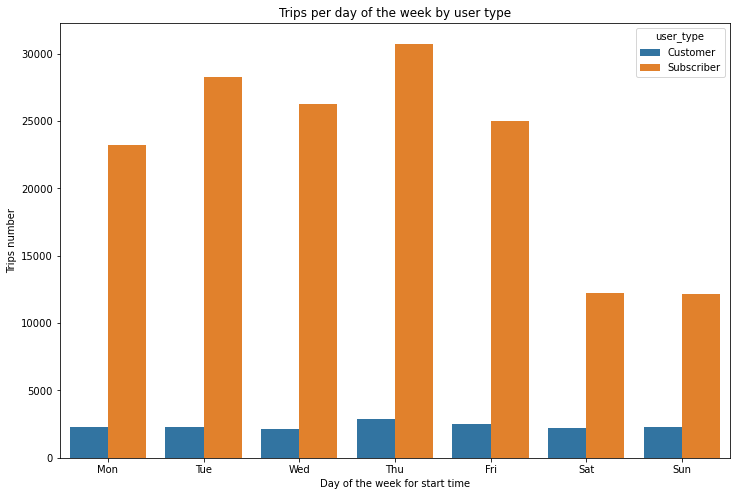

In [54]:
#draw a countplot to be able t visualize trips number per day of the week and user type
plt.figure(figsize=(12,8))
dayOfWeek=df.start_time.dt.dayofweek
sb.countplot(data=df, x=dayOfWeek, hue='user_type')
plt.xlabel('Day of the week for start time')
plt.ylabel('Trips number')
plt.title("Trips per day of the week by user type");
l1=[0,1,2,3,4,5,6]
l2=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(l1, l2)
plt.show()

#### Observations

Cusotmers behaviour is almost the same each day. However, subscribers do not use Ford GoBike System during the weekend as much as during weekdays. The highest usage day of the system is Thursay for both users' types.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> <ul>
    <li>We do not observe a high correlation between age and trip duration. Users in their early thirties ride bikes longer than other users.</li>
    <li>Although 90% of users are subscribers, customers take longer rides using Ford GoBike System.</li>
    <li>Although 74.6% of users are male, female and other take longer rides using Ford GoBike System.</li>
  </ul>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Cusotmers behaviour is almost the same each day. However, subscribers do not use Ford GoBike System during the weekend as much as during weekdays.

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='multi'></a>
## Multivariate Exploration

### Visualizing duration of trips per day of the week by user type

#### Question
I studied earler trips per day of the week by user type. I found out that customers usage rate and subsccribers usage rate during days of the week is not the same. I am wondering if the same behaviour will be reflected in their riding duration during each day of the week.

#### Code

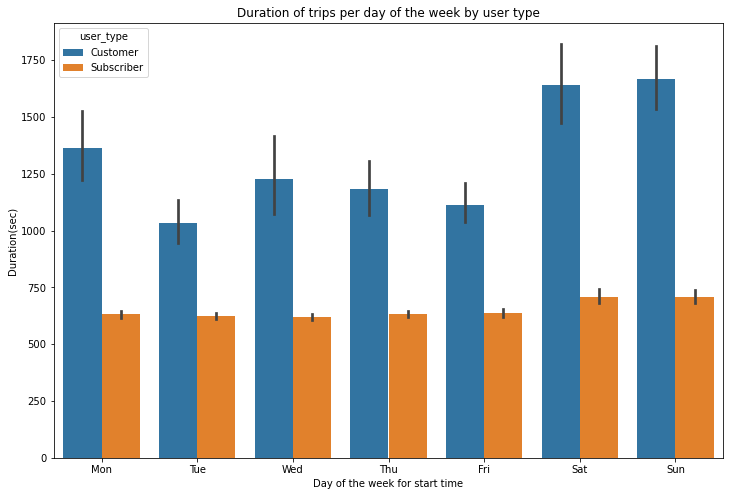

In [55]:
#draw a barplot to be able t visualize trips duration per day of the week and user type
plt.figure(figsize=(12,8))
dayOfWeek=df.start_time.dt.dayofweek
sb.barplot(data=df, x=dayOfWeek, y='duration_sec', hue='user_type')
plt.xlabel('Day of the week for start time')
plt.ylabel('Duration(sec)')
plt.title("Duration of trips per day of the week by user type");
l1=[0,1,2,3,4,5,6]
l2=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(l1, l2)
plt.show()

#### Observations

We can notice that rides duration each day does not reflect the behaviour observed ealier with the number of trips. Subscribers tends to have steadier ride duration than customers which unexpectedly ride bikes longer during the weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, the tupe of users is impacting the ride duration for each day in the week.

### Were there any interesting or surprising interactions between features?

> Yes, though the number of trips by scbscribers is not stable, the ride duration is almost the same. Meanwhile, customers present a whole opposite behaviour.  

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='store'></a>
## Storing Data

In [58]:
#save wraangled dataset to be used during explanatory analysis
df.to_csv('clean201902-fordgobike-tripdata.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='conclusion'></a>
## Conclusions
This exploration analysis allowed us to find out several dependencies between the variables and to 
wrangle the dataset using visualization. Also we could notice several unexpected entries and 
relationships:
1. Univariate Exploration
>- The highest usage rate of Ford GoBike System is on Thursday.
>- In the dataset, there several entries of elders whose age is more than 100. The most of users are in their early thirties
>- The most preferable start and end stations are almost the same
>- The least preferable start and end stations are almost the same
2. Bivariate Exploration
>- People in their thirties are not only the most ones using Ford GoBike System. They are also the ones enjoying longer bike rides.
>- Although 90% of users are subscribers, customers take longer rides using Ford GoBike System.
>- Although 74.6% of users are male, female and other take longer rides using Ford GoBike System.
3. Multivariate Exploration 
>Customers’ usage rate is almost the same but their rides’ duration is variable. Their longest rides happen to be in the weekends which represent the lowest usage rate.
On the other hand, subscribers, the most users of the system, use the system in the opposite way
